## Задание № 2

### Урок 2.  Масштабирование признаков. L1- и L2-регуляризация. Стохастический градиентный спуск

#### Задача № 1

Сгенерировать датасет при помощи sklearn.datasets.make_regression и
обучить линейную модель при помощи градиентного и стохастического градиентного спуска.
Нанести среднеквадратичную ошибку для обоих методов на один график,
сделать выводы о разнице скорости сходимости каждого из методов.


In [399]:
import numpy as np
import matplotlib.pyplot as plt

In [400]:
from sklearn import datasets

intercept = 20
n_samples = 100
X, y, coef = datasets.make_regression(n_samples=n_samples, n_features=1, coef=True,
                                      bias=intercept, noise=30,
                                      random_state=42)
coef

array(41.74110031)

> в X наблюдения располагаются в строках

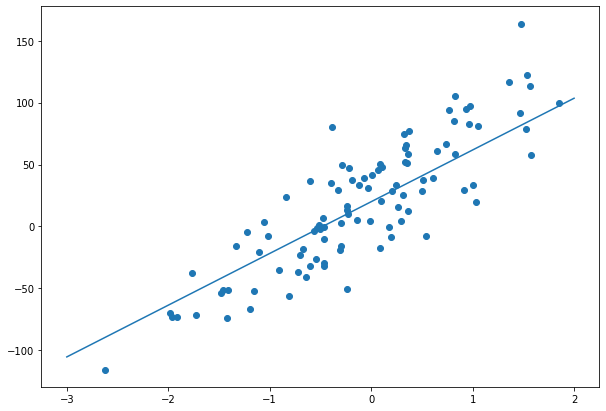

In [401]:
plt.figure(figsize=(10, 7))
plt.scatter(X, y)
l = coef.tolist()
x = np.array([-3, 2])
plt.plot(x, intercept + l * x)


> Представлена оригинальная функция и распределение точек

In [402]:
def calc_mse(y_orig, y_pred, w=0, tetta=0):
    calc_err = np.mean((y_orig - y_pred) ** 2)
    return calc_err

In [403]:
def reg_l2(y, y_pred, w, tetta=1e-3):
    norm = 0
    for w_i in w:
        norm += w_i ** 2
    calc_err = np.mean((y - y_pred) ** 2) + tetta * norm
    return calc_err

In [404]:
def reg_l1(y, y_pred, w, tetta=1e-3):
    norm = 0
    for w_i in w:
        norm += abs(w_i)
    calc_err = np.mean((y - y_pred) ** 2) + tetta * norm
    return calc_err

> функция принимает в качестве параметра функцию регуляризации
- calc_mse - MSE
- reg_l2 - L2 (Ridge)
- reg_l1 - L1 (Lasso)

In [405]:
def eval_model(X, y, iterations, proc_loss, alpha=1e-4, tetta=0.1):
    Way = []
    Err = []
    X = np.hstack((np.ones((X.shape[0], 1)), X))
    w = np.random.randn(X.shape[1])
    n = X.shape[0]
    for i in range(1, iterations + 1):
        y_pred = np.dot(w, X.T)
        err = proc_loss(y, y_pred, w=w, tetta=tetta)
        w -= (alpha * (1 / n * 2 * np.dot((y_pred - y), X)))
        Way.append([i, w])
        Err.append([err])
    return Way, Err

In [406]:
w, err = eval_model(X, y, 500, calc_mse, alpha=1e-2)
w[-1][1], err[-1]
# (array([23.50675939, 49.81619045]), [730.628964658323])

(array([23.4863507 , 49.81005381]), [702.4886166907012])

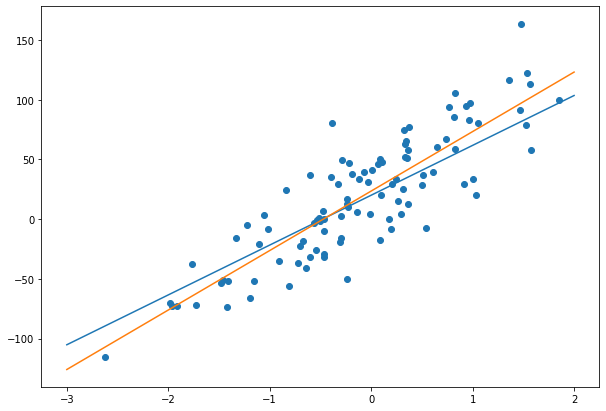

In [407]:
w_opt = w[-1][1]
plt.figure(figsize=(10, 7))
plt.scatter(X, y)
l = coef.tolist()
x = np.array([-3, 2])
plt.plot(x, intercept + l * x)
plt.plot(x, w_opt[0] + w_opt[1] * x)

> Восстановленная линейная зависимость

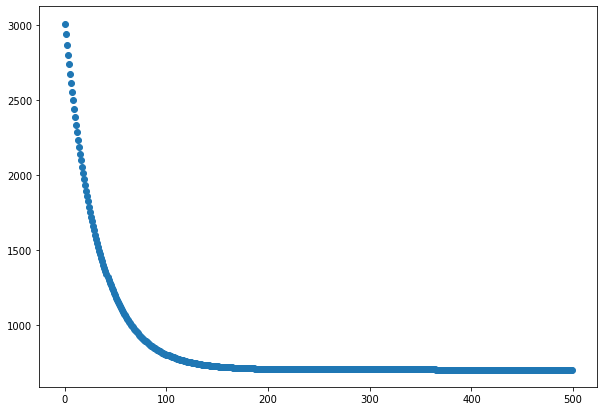

In [408]:
plt.figure(figsize=(10, 7))
plt.scatter(list(range(0, 500)), err)

> около 200 итерации оптимизация стабилизировалась

#### Стохастический градиентный спуск

In [409]:
def eval_sgd_model(X, y, iterations, qty_in_batch=10, alpha=1e-4):
    Way = []
    Err = []
    err_calc = 0
    X = np.hstack((np.ones((X.shape[0], 1)), X))
    w = np.random.randn(X.shape[1])  #
    n = X.shape[0]  #
    n_batch = n // qty_in_batch
    if n % qty_in_batch != 0:
        n_batch += 1
    for i in range(1, iterations + 1):
        for b in range(n_batch):
            start_ = qty_in_batch * b
            end_ = qty_in_batch * (b + 1)

            # print(b, n_batch, start_, end_)

            X_tmp = X[start_: end_, :]
            y_tmp = y[start_: end_]
            y_pred_tmp = np.dot(w, X_tmp.T)  #
            err_calc = calc_mse(y_tmp, y_pred_tmp)
            w -= (alpha * (1 / n * 2 * np.dot((y_pred_tmp - y_tmp), X_tmp)))
        Way.append([i, w])
        Err.append([err_calc])
        if i % (iterations / 10) == 0:
            print(i, w, err_calc)
    return Way, Err

In [410]:
w1, err1 = eval_sgd_model(X, y, iterations=1000, qty_in_batch=10, alpha=1e-3)

100 [4.21918777 8.00818429] 2814.6899214106184
200 [ 6.98671087 14.04541284] 2238.8867564258835
300 [ 9.35752038 19.21086362] 1807.3592336571169
400 [11.38837347 23.63047211] 1482.9111922425186
500 [13.12792812 27.41197184] 1238.09774607346
600 [14.61789487 30.64752696] 1052.6445886841595
700 [15.89402555 33.4159838 ] 911.5538965863418
800 [16.98696192 35.78479643] 803.7136250546437
900 [17.92296392 37.81167374] 720.87595551953
1000 [18.72453458 39.54598804] 656.9065197623526


In [411]:
w1[-1][1], err1[-1]

(array([18.72453458, 39.54598804]), [656.9065197623526])

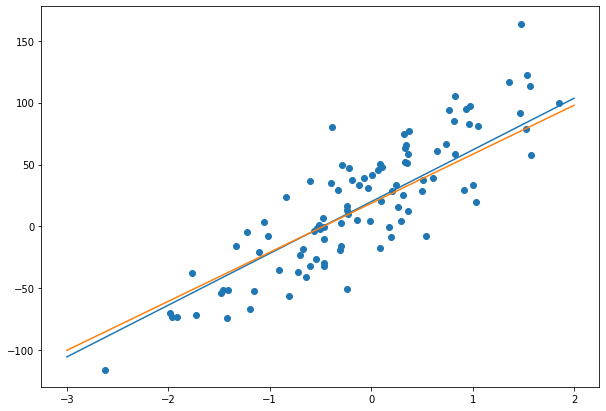

In [412]:
w_opt = w1[-1][1]
plt.figure(figsize=(10, 7))
plt.scatter(X, y)
l = coef.tolist()
x = np.array([-3, 2])
plt.plot(x, intercept + l * x)
plt.plot(x, w_opt[0] + w_opt[1] * x)

> Восстановленная линейная зависимость

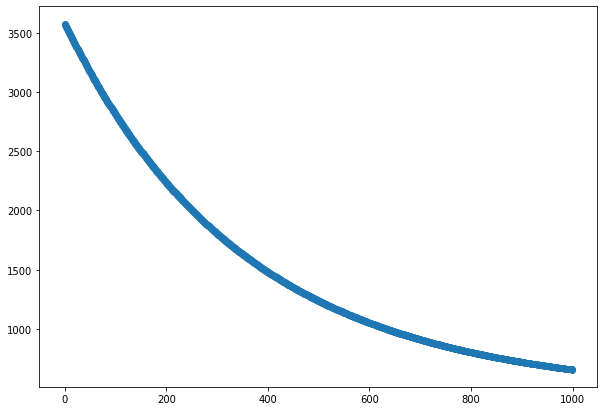

In [413]:
plt.figure(figsize=(10, 7))
plt.scatter(list(range(0, 1000)), err1)

#### Задача № 2

Модифицировать решение первого задания путем добавления 𝐿2 -регуляризации
(в функцию, считающую MSE, нужно добавить норму вектора весов) и сравнить результаты.



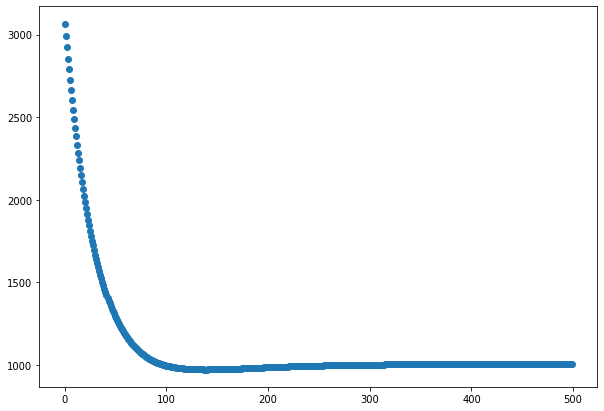

In [414]:
w, err = eval_model(X, y, 500, reg_l2, alpha=1e-2, tetta=.1)
plt.figure(figsize=(10, 7))
plt.scatter(list(range(0, 500)), err)

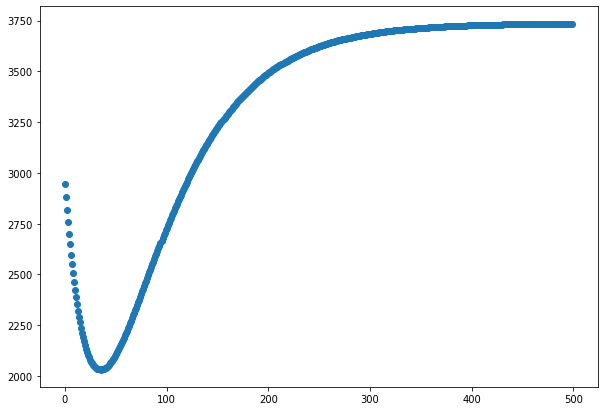

In [415]:
_, err = eval_model(X, y, 500, reg_l2, alpha=1e-2, tetta=1)
plt.figure(figsize=(10, 7))
plt.scatter(list(range(0, 500)), err)

> При коэффициенте регуляризации = 1 происходит мин ошибка уже на 50 итерации


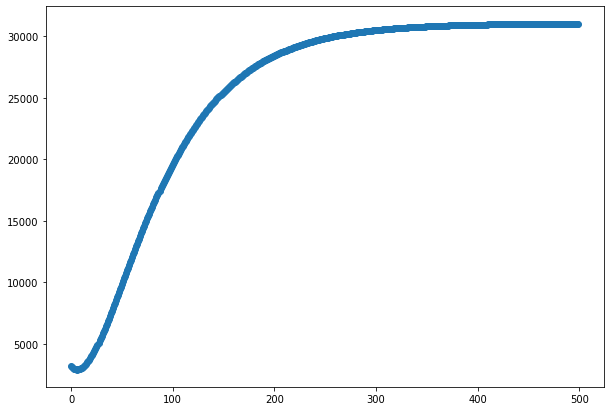

In [416]:
_, err = eval_model(X, y, 500, reg_l2, alpha=1e-2, tetta=10)
plt.figure(figsize=(10, 7))
plt.scatter(list(range(0, 500)), err)

> При коэффициенте регуляризации = 10 поймать минимум становится труднее

#### Задача № 3 *

Модернизировать решение задания 2, заменив L2 регуляризацию на L1 регуляризацию.




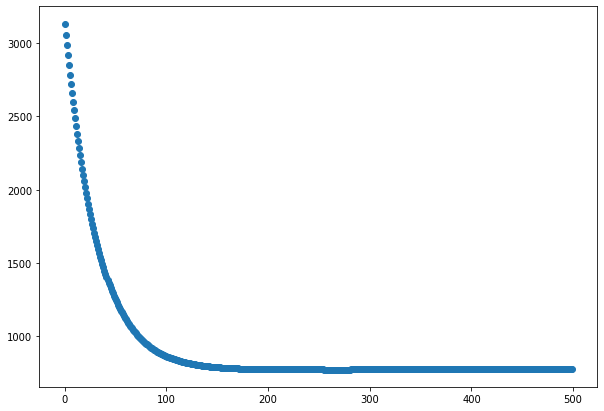

In [417]:
_, err = eval_model(X, y, 500, reg_l1, alpha=1e-2, tetta=1)
plt.figure(figsize=(10, 7))
plt.scatter(list(range(0, 500)), err)

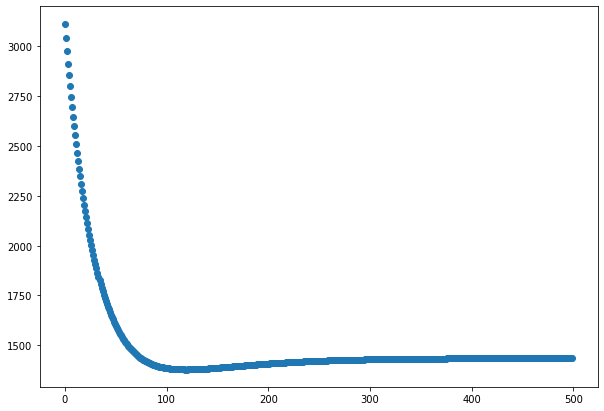

In [418]:
_, err = eval_model(X, y, 500, reg_l1, alpha=1e-2, tetta=10)
plt.figure(figsize=(10, 7))
plt.scatter(list(range(0, 500)), err)

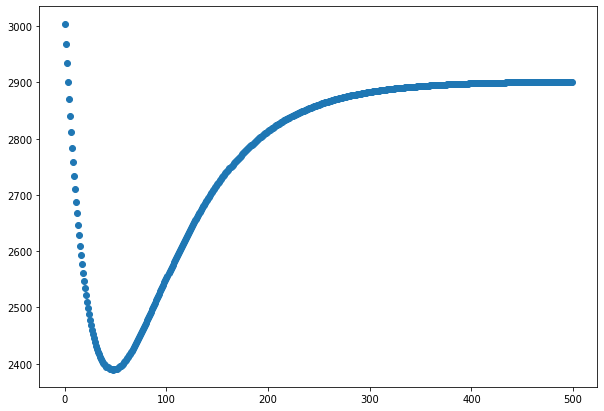

In [419]:
_, err = eval_model(X, y, 500, reg_l1, alpha=1e-2, tetta=30)
plt.figure(figsize=(10, 7))
plt.scatter(list(range(0, 500)), err)
